In [47]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)
import math

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [3]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [4]:
mnist.train.num_examples

55000

In [5]:
mnist.test.num_examples

10000

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
mnist.train

In [8]:
from pprint import pprint
pprint(mnist.train.__dict__)

{'_epochs_completed': 0,
 '_images': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 '_index_in_epoch': 0,
 '_labels': array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]]),
 '_num_examples': 55000}


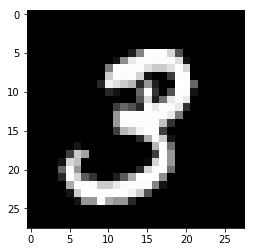

In [9]:
single_image = mnist.train.images[1].reshape(28,28)
plt.imshow(single_image,cmap='gist_gray')

In [10]:
single_image.min()

0.0

In [11]:
single_image.max()

1.0

### Create Model

In [12]:
from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

In [13]:
sess = tf.InteractiveSession()

x = tf.placeholder(tf.float32,shape=[None,784], name="x")
W = tf.Variable(tf.zeros([784,10]), name="W")
b = tf.Variable(tf.zeros([10]), name="b")
y = tf.matmul(x,W) + b 

y_true = tf.placeholder(tf.float32,[None,10])

# cross entropy
all_cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=y)
cross_entropy = tf.reduce_mean(all_cross_entropy) # reduce_mean: reduce matrix dimension by mean

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

# plot loss
summer_op = tf.summary.scalar("loss", cross_entropy)
summary_writer = tf.summary.FileWriter('./tmp/tfboard', graph=tf.get_default_graph())
# session
init = tf.global_variables_initializer()

sess.run(init)
all_loss = []
for step in range(1000):
    batch_x, batch_y = mnist.train.next_batch(1000)
    _, cross_entropy_val, summary = sess.run([train, cross_entropy, summer_op], feed_dict={x:batch_x, y_true:batch_y})
    summary_writer.add_summary(summary, step)
    if step%100 == 0:
        print('step:', step,' cross_entropy:',cross_entropy_val)
        all_loss.append(cross_entropy_val)
matches = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1)) # argmax: index of max value
acc = tf.reduce_mean(tf.cast(matches,tf.float32)) # cast: change type

acc_val, matches_val, y_eval = sess.run([acc, matches, y] ,feed_dict={x:mnist.test.images,y_true:mnist.test.labels})
acc_val

step: 0  cross_entropy: 2.3025827
step: 100  cross_entropy: 0.39260146
step: 200  cross_entropy: 0.35557562
step: 300  cross_entropy: 0.31407818
step: 400  cross_entropy: 0.34018102
step: 500  cross_entropy: 0.29533985
step: 600  cross_entropy: 0.2953984
step: 700  cross_entropy: 0.31214824
step: 800  cross_entropy: 0.31619886
step: 900  cross_entropy: 0.29433283
step: 1000  cross_entropy: 0.29301843
step: 1100  cross_entropy: 0.23124777
step: 1200  cross_entropy: 0.22920758
step: 1300  cross_entropy: 0.28965038
step: 1400  cross_entropy: 0.21948606
step: 1500  cross_entropy: 0.3084684
step: 1600  cross_entropy: 0.27968967
step: 1700  cross_entropy: 0.29636636
step: 1800  cross_entropy: 0.2435506
step: 1900  cross_entropy: 0.27549574
step: 2000  cross_entropy: 0.2707849
step: 2100  cross_entropy: 0.24027519
step: 2200  cross_entropy: 0.32442725
step: 2300  cross_entropy: 0.27586958
step: 2400  cross_entropy: 0.22272693
step: 2500  cross_entropy: 0.294308
step: 2600  cross_entropy: 0.22

0.9243

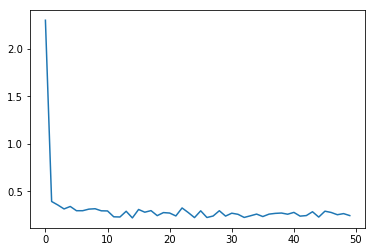

In [14]:
plt.plot(all_loss)

In [29]:
def create_sprite_image(images):
    """Returns a sprite image consisting of images passed as argument. Images should be count x width x height"""
    if isinstance(images, list):
        images = np.array(images)
    img_h = images.shape[1]
    img_w = images.shape[2]
    n_plots = int(np.ceil(np.sqrt(images.shape[0])))
    
    
    spriteimage = np.ones((img_h * n_plots ,img_w * n_plots ))
    
    for i in range(n_plots):
        for j in range(n_plots):
            this_filter = i * n_plots + j
            if this_filter < images.shape[0]:
                this_img = images[this_filter]
                spriteimage[i * img_h:(i + 1) * img_h,
                  j * img_w:(j + 1) * img_w] = this_img
    return spriteimage

('label:', array([[6, 6, 2, 7, 4, 9, 3, 5, 7, 5],
        [7, 8, 5, 6, 0, 4, 6, 9, 5, 3],
        [7, 7, 3, 5, 0, 4, 7, 7, 5, 3],
        [7, 8, 0, 8, 9, 8, 3, 3, 5, 1],
        [6, 1, 2, 3, 1, 9, 5, 2, 1, 8],
        [3, 8, 8, 4, 9, 6, 8, 3, 4, 9],
        [5, 6, 2, 8, 9, 8, 9, 5, 9, 3],
        [7, 3, 2, 9, 7, 5, 2, 7, 5, 0],
        [9, 2, 6, 0, 3, 8, 7, 3, 9, 5],
        [2, 5, 8, 9, 8, 9, 4, 3, 2, 3]]))

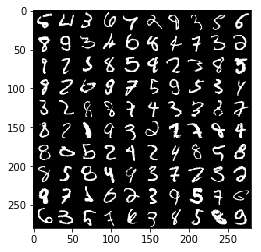

In [61]:
num_display = 100
false_index = np.where(matches_val==False)[0][0:num_display]
plt.imshow(create_sprite_image(mnist.test.images[false_index].reshape(-1, 28,28)), cmap='gist_gray')
# print(y_eval[false_index])

num_column = math.ceil(math.sqrt(num_display))
'label:', np.argmax(y_eval[false_index], axis=1).reshape(-1, num_column)



### Weight

(-0.58829176, 0.33051315)

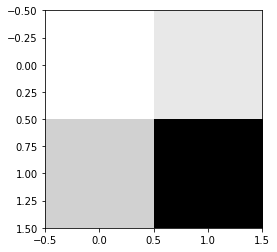

In [59]:
# understand how gist_gray works
plt.imshow([[1,0],[-1,-10]], cmap='gist_gray')
img_0.min(),img_0.max()

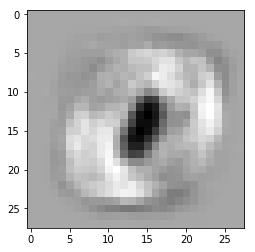

In [71]:
weight = W.eval()

img_0 = weight[:,0].reshape(28,-1)
plt.imshow(img_0, cmap='gist_gray')

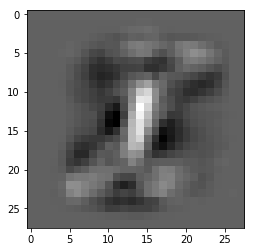

In [72]:
img_1 = weight[:,1].reshape(28,-1)
plt.imshow(img_1, cmap='gist_gray')

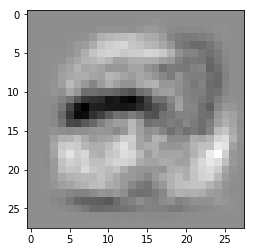

In [73]:
img_2 = weight[:,2].reshape(28,-1)
plt.imshow(img_2, cmap='gist_gray')

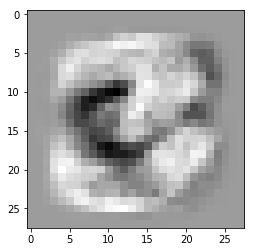

In [74]:
img_3 = weight[:,3].reshape(28,-1)
plt.imshow(img_3, cmap='gist_gray')

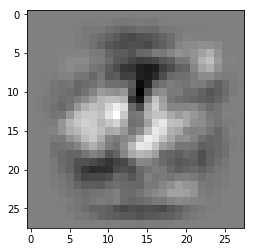

In [75]:
img_4 = weight[:,4].reshape(28,-1)
plt.imshow(img_4, cmap='gist_gray')

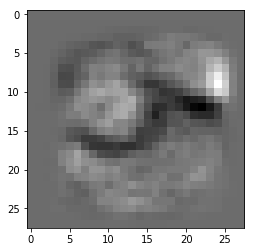

In [76]:
img_5 = weight[:,5].reshape(28,-1)
plt.imshow(img_5, cmap='gist_gray')

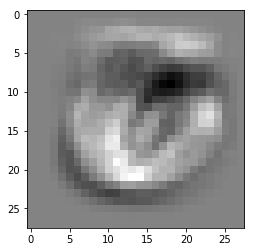

In [67]:
img_6 = weight[:,6].reshape(28,-1)
plt.imshow(img_6, cmap='gist_gray')

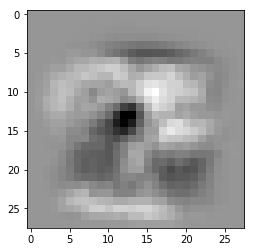

In [61]:
img_7 = weight[:,7].reshape(28,-1)
plt.imshow(img_7, cmap='gist_gray')

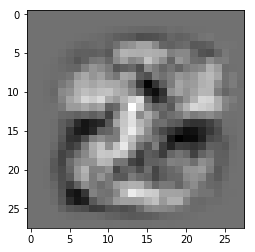

In [68]:
img_8 = weight[:,8].reshape(28,-1)
plt.imshow(img_8, cmap='gist_gray')

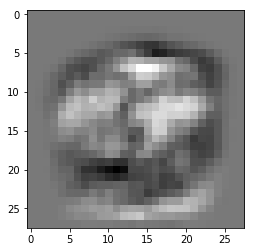

In [69]:
img_9 = weight[:,9].reshape(28,-1)
plt.imshow(img_9, cmap='gist_gray')